In [1]:
#@title
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## <font size=8pt><font color='blue' size=8pt> Support Vector Regression </font>


Seminal Paper (1992): http://www.svms.org/training/BOGV92.pdf



Support Vectors is a method used in Machine Learning for both regression and classification problmes. The main idea is to map the input features into a higher dimensional space and then, in that higher dimensional space, address the problem to solve. 

For regression, SVM consists of an algorithm that solves a quadratic optimization problem with constraints:

$$\large
\text{minimize}\frac{1}{2}\|w\|^2
$$

subject to 

$$\large{
y_i -wx_i - b\leq\epsilon\\
wx_i+b-y_i \leq \epsilon}
$$

We can express the constrints as:

$$\large |y_i - (wx_i+b)|\leq\epsilon$$
Intuitively we have

<figure>
<center>
<img src='https://drive.google.com/uc?id=1UGho79Fz8x5eTpNEMG_ZhuZ5s9xXkoFn' 
width='600px' />
<figcaption>Main Idea for SVR in 1-D</figcaption></center>
</figure>


## Slack Variables

SVR with slack variables consists of an algorithm that solves a quadratic optimization problem with constraints:

$$
\text{minimize}\frac{1}{2}\|w\|^2 + C\sum_{i=1}^{n}|\xi_i|
$$

subject to 

$$
|y_i - x_i\cdot w - b|\leq\epsilon + |\xi_i|
$$

where $x_i = (x_{i1},x_{i2},...x_{ip})$ represents the ith observation that has $p$ features and $w$ is the vector of the weights. We have $1\times p \cdot p\times 1 = 1\times 1$ The main idea is that the slack variables will accommodate points that are "close" to the epsilon margins and that may influence the influence the value of the weights. 

<font color='green'> This means that we have at least two different hyperparameters in this case such as $\epsilon$ and $C$.</font>


In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse

In [3]:
data = pd.read_csv('drive/MyDrive/Data Sets/concrete.csv')

In [4]:
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
# here we need some imports and some data!
# we can import, for example, the concrete data set

In [6]:
# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(data['cement'].values.reshape(-1,1), data['strength'].values, test_size=0.3, random_state=123)

In [7]:
eps = 1
C = 2.0
model = SVR(kernel='linear',C=C,epsilon=eps)

In [8]:
# here we fit SVR on the whole data
model.fit(data['cement'].values.reshape(-1,1),data['strength'])

SVR(C=2.0, epsilon=1, kernel='linear')

In [10]:
xvals = np.linspace(70,550,num=200)
yh = model.predict(xvals.reshape(-1,1))

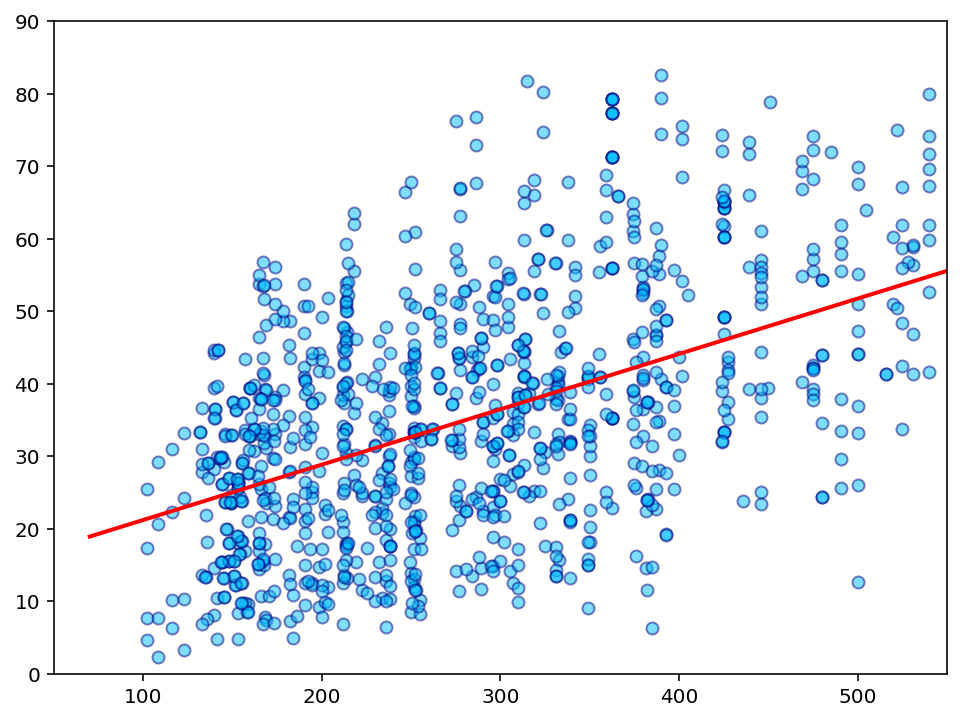

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(data['cement'],data['strength'],color='deepskyblue',ec='navy',alpha=0.5)
plt.plot(xvals,yh,color='red',lw=2)
plt.xlim([50,550])
plt.ylim([0,90])
plt.show()

In [73]:
def svr_results(y_test, X_test, fitted_svr_model):
    
    print("C: {}".format(fitted_svr_model.C))
    print("Epsilon: {}".format(ffittl.epsilon))
    
    #print("Intercept: {:,.3f}".format(fitted_svr_model.intercept_[0]))
    #print("Coefficient: {:,.3f}".format(fitted_svr_model.coef_[0][0]))
    
    print("R2 = {:,.2f}".format(model.score(X_test,y_test)))
    MSE = mse(y_test, fitted_svr_model.predict(X_test))
    print("MSE = {:,.2f}".format(MSE))
    
    perc_within_eps = 100*np.sum([np.abs(y_test - fitted_svr_model.predict(X_test)) < eps]) / len(y_test)
    print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))
    
    # for meaningful plotting we need the x to be ordered
    dat = np.column_stack([X_test,y_test])
    dat_sorted = dat[dat[:,0].argsort(),:]
    xtest_sorted = dat_sorted[:,0].reshape(-1,1) 
    # Plot outputs
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_xlim(80, 550)
    ax.set_ylim(0, 90)
    ax.scatter(X_test, y_test,s=25,color='deepskyblue',ec='navy',alpha=0.5)
    ax.plot(xtest_sorted, fitted_svr_model.predict(xtest_sorted), color='red')
    ax.plot(xtest_sorted, fitted_svr_model.predict(xtest_sorted)+eps, color='orange')
    ax.plot(xtest_sorted, fitted_svr_model.predict(xtest_sorted)-eps, color='orange')
    ax.set_xlabel('Cement',fontsize=14,color='darkgreen')
    ax.set_ylabel('Strength',fontsize=14,color='darkgreen')
    ax.set_title('SVR Predictions',fontsize=16,color='purple')
    ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
    ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
    ax.minorticks_on()

In [74]:
eps = 4
model = SVR(kernel='linear',C=1.0,epsilon=eps)

In [75]:
model.fit(X_train,y_train)

SVR(epsilon=4, kernel='linear')

C: 1.0
Epsilon: 4
R2 = 0.24
MSE = 200.37
Percentage within Epsilon = 19.42%


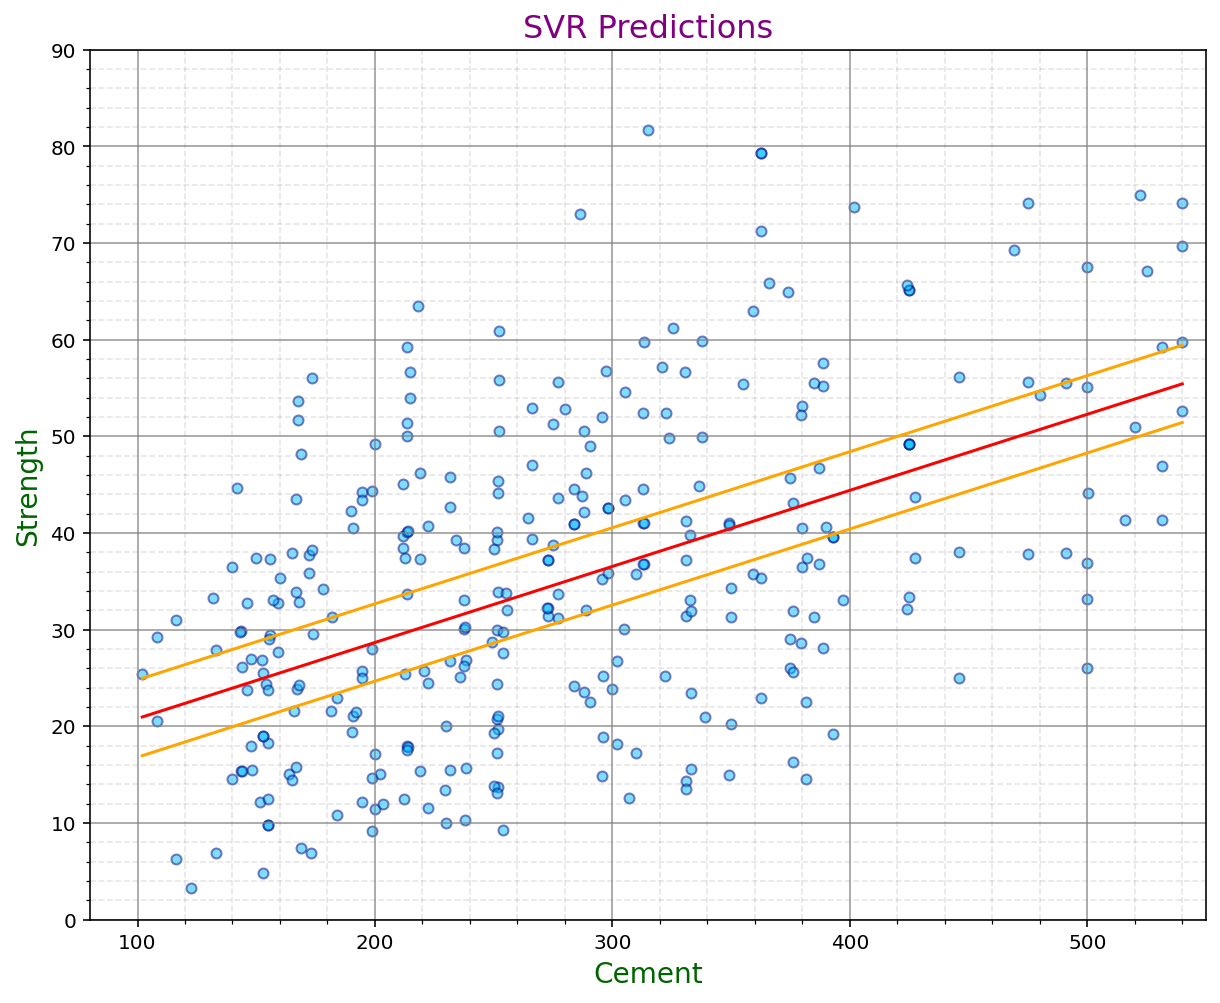

In [76]:
svr_results(y_test,X_test,model)

In [98]:
eps = 10
model = SVR(kernel='poly',degree=3,C=2.0,epsilon=eps)

In [99]:
model.fit(X_train,y_train)

SVR(C=2.0, epsilon=10, kernel='poly')

C: 2.0
Epsilon: 10
R2 = 0.21
MSE = 209.02
Percentage within Epsilon = 47.25%


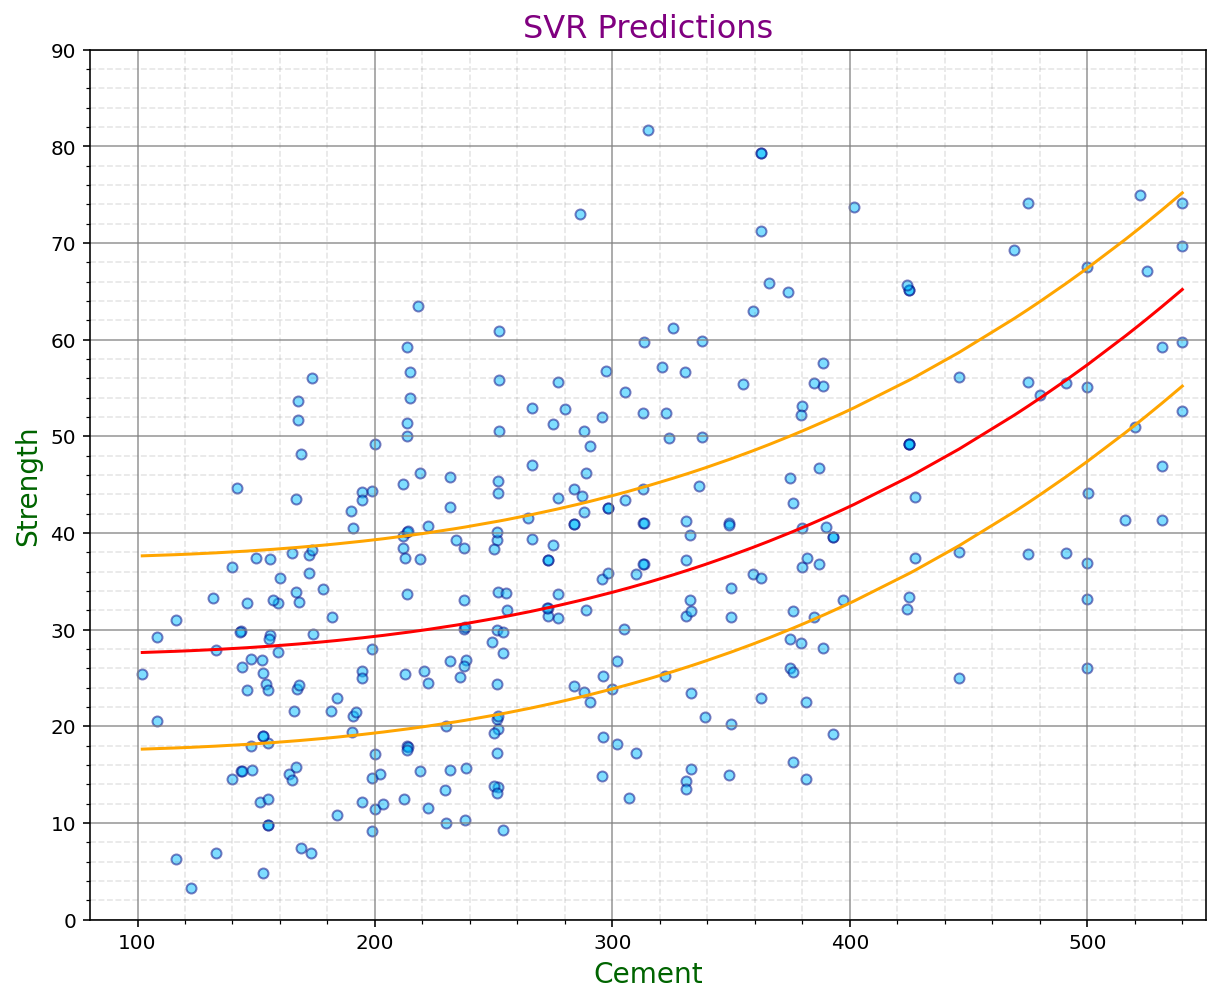

In [100]:
svr_results(y_test,X_test,model)

We need sorted values for X_test!!

## SVM with Radial Basis Function Kernel (the kernel "trick") for Classification

<figure>
<center>
<img src='https://drive.google.com/uc?id=1IuYqAUe7cV8pwxwTUlxQTVUPI2smrcME' 
width='1000px' />
<figcaption>SVM with Radial Basis Function Kernel</figcaption></center>
</figure>

For this we would need at least one landmark point $x_0$. The following is also called a "Gaussian" kernel

$$\Large
(x,y) \rightarrow \left(x,y,z:=e^{-\gamma[(x-x_0)^2+(y-y_0)^2]}\right)
$$